<a href="https://colab.research.google.com/github/sundar-nallalagappan/Autoencoders/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("sairam")

sairam


In [2]:
#!pip install tensorflow
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model

from keras.datasets import mnist
import numpy as np

In [49]:
#bottle neck size - input image will be encoded into the below dimension
encoding_dim = 64

#Input image shape
input_img = Input(shape=(784,))

#Encoded representation of input == Bottleneck
encoded = Dense(units=encoding_dim, activation='relu')(input_img)

#Decoded represents the reconsutruction of the image
decoded = Dense(units=784, activation='sigmoid')(encoded)

#Autoencoder represents the whole unit - input to reconstruction
autoencoder = Model(input_img, decoded)

* Separate encoder model

In [50]:
encoder = Model(input_img, encoded)

* Separate Decoder model

In [51]:
#encoded shape - placeholder
encoded_input = Input(shape=(encoding_dim,))

#Pick the decoder layer from the whole model
decoded_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoded_layer(encoded_input))

In [52]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
(X_train, _), (X_test, _) = mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [54]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [55]:
np.prod(X_train.shape[1:])

784

In [56]:
print(X_train.dtype)
X_train = X_train.astype("float32")/255.
X_test  = X_test.astype("float32")/255.
print(X_train.dtype)

print(X_train.shape, X_test.shape)

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test  = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape, X_test.shape)

uint8
float32
(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [57]:
autoencoder.fit(X_train, X_train, epochs=50, validation_data=(X_test, X_test), batch_size=256)

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2453 - val_loss: 0.1604
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1427 - val_loss: 0.1263
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1178 - val_loss: 0.1084
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1039 - val_loss: 0.0977
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0951 - val_loss: 0.0907
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0888 - val_loss: 0.0853
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0843 - val_loss: 0.0818
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0812 - val_loss: 0.0791
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0791 - val_loss: 0.0775
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0776 - val_loss: 0.0763

In [58]:
X_test.shape

(10000, 784)

* Encode the original image from 784dims to 32dims (bottle neck)

In [59]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

313/313 [==============================] - 0s 1ms/step


(10000, 64)

* Reconstruct the original image from 32 dim to 784dim

In [60]:
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape

313/313 [==============================] - 0s 1ms/step


(10000, 784)

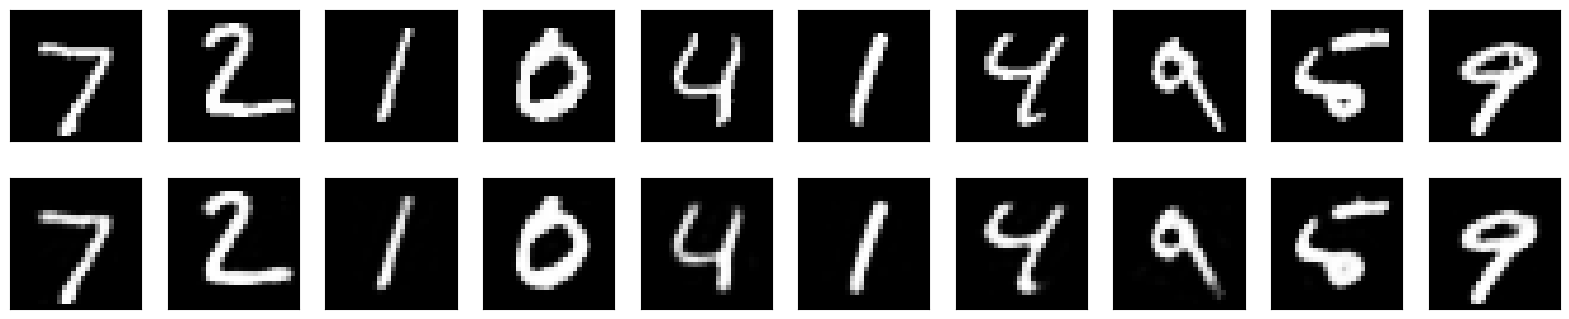

In [61]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()